In [1]:
# Normally used imports
import pandas as pd
import numpy as np

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules and libraries we'll use:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_daily_reports

01-22-2020.csv   02-15-2020.csv   03-10-2020.csv   04-03-2020.csv
01-23-2020.csv   02-16-2020.csv   03-11-2020.csv   04-04-2020.csv
01-24-2020.csv   02-17-2020.csv   03-12-2020.csv   04-05-2020.csv
01-25-2020.csv   02-18-2020.csv   03-13-2020.csv   04-06-2020.csv
01-26-2020.csv   02-19-2020.csv   03-14-2020.csv   04-07-2020.csv
01-27-2020.csv   02-20-2020.csv   03-15-2020.csv   04-08-2020.csv
01-28-2020.csv   02-21-2020.csv   03-16-2020.csv   04-09-2020.csv
01-29-2020.csv   02-22-2020.csv   03-17-2020.csv   04-10-2020.csv
01-30-2020.csv   02-23-2020.csv   03-18-2020.csv   04-11-2020.csv
01-31-2020.csv   02-24-2020.csv   03-19-2020.csv   04-12-2020.csv
02-01-2020.csv   02-25-2020.csv   03-20-2020.csv   04-13-2020.csv
02-02-2020.csv   02-26-2020.csv   03-21-2020.csv   04-14-2020.csv
02-03-2020.csv   02-27-2020.csv   03-22-2020.csv   04-15-2020.csv
02-04-2020.csv   02-28-2020.csv   03-23-2020.csv   04-16-2020.csv
02-05-2020.csv   02-29-2020.csv   03-24-2020.csv   04-17-2020.csv
02-06-2020

In [3]:
#https://docs.python.org/3/library/os.html
import os

# this folder daily report folder hence it's name will increase by one each day
# TODO 
folder_path = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'
number_of_files = os.listdir(folder_path)

numfiles = len(number_of_files)
print("Number of current Daily Reports: ", numfiles-1)

Number of current Daily Reports:  93


In [9]:
# another  way would be to count csv files
# https://docs.python.org/3/library/glob.html
#import glob

#file_path = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'
#extension = 'csv'
#os.chdir(file_path)
#result = glob.glob('*.{}'.format(extension))
#print(result)

In [4]:
#combined_daily_report = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/combined_csv.csv')
daily_report = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-21-2020.csv')

In [64]:
combined_daily_report = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/combined_csv.csv')

In [5]:
#get memory usage
daily_report_memory = daily_report.memory_usage().sum()/1024**2
print("Daily Report has allocated %.2f MBs" %(daily_report_memory))

Daily Report has allocated 0.28 MBs


In [65]:
#get memory usage
combined_daily_report_memory = combined_daily_report.memory_usage().sum()/1024**2
print("Daily Report has allocated %.2f MBs" %(combined_daily_report_memory ))

Daily Report has allocated 7.74 MBs


In [6]:
daily_report.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-21 23:30:50,34.223334,-82.461707,17,0,0,17,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-21 23:30:50,30.295065,-92.414197,114,7,0,107,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-21 23:30:50,37.767072,-75.632346,52,0,0,52,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-21 23:30:50,43.452658,-116.241552,616,12,0,604,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-21 23:30:50,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [7]:
list(daily_report.columns)

['FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key']

In [8]:
daily_report.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [9]:
World_Report = daily_report[['Province_State', 'Country_Region', 'Last_Update', 'Confirmed', 'Recovered','Active', 'Deaths' ]]

In [10]:
World_Report

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Active,Deaths
0,South Carolina,US,2020-04-21 23:30:50,17,0,17,0
1,Louisiana,US,2020-04-21 23:30:50,114,0,107,7
2,Virginia,US,2020-04-21 23:30:50,52,0,52,0
3,Idaho,US,2020-04-21 23:30:50,616,0,604,12
4,Iowa,US,2020-04-21 23:30:50,1,0,1,0
...,...,...,...,...,...,...,...
3094,NaN,West Bank and Gaza,2020-04-21 23:30:30,466,71,391,4
3095,NaN,Western Sahara,2020-04-21 23:30:30,6,0,6,0
3096,NaN,Yemen,2020-04-21 23:30:30,1,0,1,0
3097,NaN,Zambia,2020-04-21 23:30:30,70,35,32,3


In [11]:
World_Report.sort_values(by='Province_State', ascending=True)

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Active,Deaths
1571,Alabama,US,2020-04-21 23:30:50,65,0,60,5
2434,Alabama,US,2020-04-21 23:30:50,50,0,48,2
2436,Alabama,US,2020-04-21 23:30:50,228,0,214,14
448,Alabama,US,2020-04-21 23:30:50,18,0,18,0
421,Alabama,US,2020-04-21 23:30:50,13,0,13,0
...,...,...,...,...,...,...,...
3094,NaN,West Bank and Gaza,2020-04-21 23:30:30,466,71,391,4
3095,NaN,Western Sahara,2020-04-21 23:30:30,6,0,6,0
3096,NaN,Yemen,2020-04-21 23:30:30,1,0,1,0
3097,NaN,Zambia,2020-04-21 23:30:30,70,35,32,3


In [12]:
World_Report.groupby(['Country_Region'])[['Province_State','Confirmed', 'Recovered','Active', 'Deaths']].sum()

,Confirmed,Recovered,Active,Deaths
Country_Region,,,,
Afghanistan,1092,150,906,36
Albania,609,345,238,26
Algeria,2811,1152,1267,392
Andorra,717,282,398,37
Angola,24,6,16,2
...,...,...,...,...
West Bank and Gaza,466,71,391,4
Western Sahara,6,0,6,0
Yemen,1,0,1,0


In [13]:
World_sums = daily_report.groupby(['Country_Region'])[['Confirmed', 'Recovered','Active', 'Deaths']].sum().reset_index()

In [14]:
World_sums.sort_values(by='Country_Region', ascending=False)

,Country_Region,Confirmed,Recovered,Active,Deaths
184,Zimbabwe,28,2,23,3
183,Zambia,70,35,32,3
182,Yemen,1,0,1,0
181,Western Sahara,6,0,6,0
180,West Bank and Gaza,466,71,391,4
...,...,...,...,...,...
4,Angola,24,6,16,2
3,Andorra,717,282,398,37
2,Algeria,2811,1152,1267,392
1,Albania,609,345,238,26


In [15]:
World_sums.loc[171]

Country_Region        US
Confirmed         823786
Recovered          75204
Active            703737
Deaths             44845
Name: 171, dtype: object

In [37]:
# here we create a boolean to test if the entry is in the US
is_US = daily_report['Country_Region'] == 'US'

# then we create a new dataframe for US Only
USA = daily_report[is_US]

In [38]:
USA.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [60]:
USA_sums = USA.groupby(['Province_State'])[['Confirmed', 'Recovered','Active', 'Deaths']].sum().reset_index()

In [61]:
USA_sums

,Province_State,Confirmed,Recovered,Active,Deaths
0,Alabama,2169,0,0,64
1,Alaska,213,0,0,6
2,Arizona,2870,0,0,73
3,Arkansas,946,0,0,18
4,California,17351,0,0,432
5,Colorado,5429,0,0,179
6,Connecticut,7781,0,0,277
7,Delaware,928,0,0,16
8,Diamond Princess,49,0,0,0
9,District of Columbia,1211,0,0,22


In [27]:
World_Report.loc[100:200]

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Active,Deaths
100,Alabama,US,2020-04-07 23:04:49,42,0,0,1
101,Georgia,US,2020-04-07 23:04:49,26,0,0,1
102,Maryland,US,2020-04-07 23:04:49,652,0,0,11
103,Maryland,US,2020-04-07 23:04:49,459,0,0,9
104,South Carolina,US,2020-04-07 23:04:49,6,0,0,0
...,...,...,...,...,...,...,...
196,Louisiana,US,2020-04-07 23:04:49,146,0,0,4
197,Virginia,US,2020-04-07 23:04:49,18,0,0,0
198,Colorado,US,2020-04-07 23:04:49,206,0,0,3
199,Kansas,US,2020-04-07 23:04:49,7,0,0,1


[JHU MAP](https://coronavirus.jhu.edu/map.html)

In [125]:
#Let's verify the US Data
import webbrowser
JHU_Map = 'https://coronavirus.jhu.edu/map.html'
webbrowser.open(JHU_Map)

True

In [126]:
#A useful feature is describe, which provides summary statistics
World.describe()

,Confirmed,Recovered,Active,Deaths
count,183.000000,183.000000,183.000000,183.000000
mean,6951.448087,1420.830601,3389.284153,379.092896
std,30851.895979,7197.198842,12306.349159,1818.632159
min,1.000000,0.000000,0.000000,0.000000
25%,21.500000,1.500000,18.000000,1.000000
50%,268.000000,25.000000,213.000000,5.000000
75%,1695.000000,116.500000,1226.000000,35.500000
max,337072.000000,77207.000000,91246.000000,15887.000000


In [128]:
World

,Country_Region,Confirmed,Recovered,Active,Deaths
0,Afghanistan,349,15,327,7
1,Albania,361,104,237,20
2,Algeria,1320,90,1078,152
3,Andorra,501,26,457,18
4,Angola,14,2,10,2
...,...,...,...,...,...
178,Vietnam,241,90,151,0
179,West Bank and Gaza,237,25,211,1
180,Western Sahara,4,0,4,0
181,Zambia,39,3,35,1


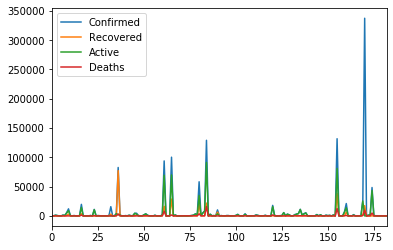

In [129]:
World.plot()

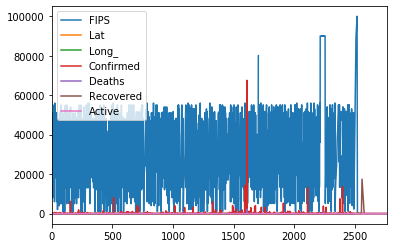

In [130]:
USA.plot()

In [20]:
World_Report['Confirmed'].sum()

1272115

In [21]:
World_Report['Deaths'].sum()

69374